### Linear Regression

Linear Regression is a method for understanding the relationship between variables by fitting a linear equation to the observed data. The model is generally expressed as:

$$
\hat{y} = w \cdot x + b
$$

where:
- \( w \) is the weight (slope)
- \( b \) is the bias (intercept)

**Key Concepts:**
- **Pattern Recognition:** Understand the trend or pattern in the dataset.
- **Gradient Descent:** An optimization algorithm used to minimize the error by updating the weight and bias.
- **Learning Rate:** A hyperparameter that controls how much the model is adjusted during each step of gradient descent.

**Steps in Training:**

1. **Initialization:**
   - Initialize the weight (\( w \)) as zero.
   - Initialize the bias (\( b \)) as zero.

2. **For Each Data Point:**
   - **Prediction:** Compute the predicted value using:
     $$
     \hat{y} = w \cdot x + b
     $$
   - **Error Calculation:** Determine the error between the predicted value and the actual value.
   - **Update Parameters:** Use gradient descent to update \( w \) and \( b \) based on the error.
   - **Iteration:** Repeat the process for a number of iterations until convergence.

**Efficient Computation:**

- Instead of processing one data point at a time, you can handle multiple data points in parallel.  
- For a set of data points \( X = [x_1, x_2, \ldots, x_n] \), compute predictions as:
  $$
  y_{\text{pred}} = w \cdot X + b \quad \text{which is equivalent to} \quad y_{\text{pred}} = [w \cdot x_1 + b, \; w \cdot x_2 + b, \; \ldots, \; w \cdot x_n + b]
  $$


In [2]:
import numpy as np

In [15]:
class LinearRegression:
    def __init__(self, lr = 0.001, n_inters=1000):
        self.lr = lr
        self.n_inters = n_inters
        self.weight = None
        self.bias = None

    def fit(self, X, y): # Training
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.n_inters):
            y_pred = np.dot(X, self.weights) + self.bias # np.dot = "Produto escalar"

            dw = 1/(num_samples) * np.dot(X.T, (y_pred-y))
            db = (1/num_samples) * np.sum(y_pred-y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db


    def predict(self, X): # Inference
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

In [10]:
# Train
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

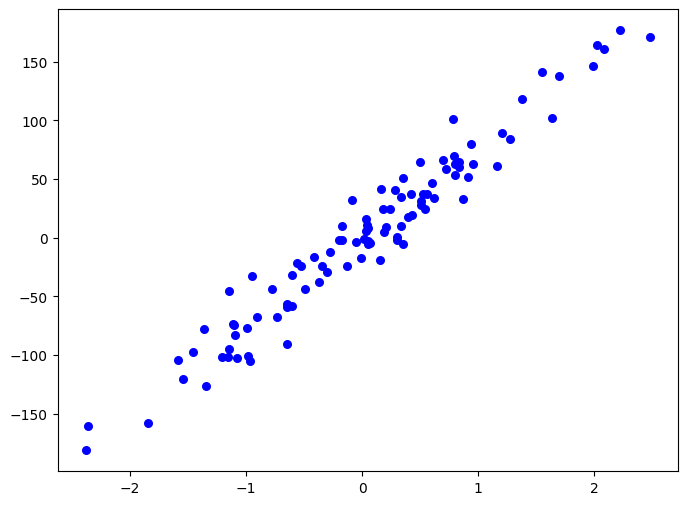

In [11]:
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], y, color='b', marker='o', s=30)
plt.show()


In [ ]:
reg = LinearRegression(lr=0.01) # I had to change the learning rate to obtain a better line
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)

def mse(y_test, predictions):
    mse_return = np.mean((y_test-predictions)**2)
    return mse_return

mse = mse(y_test, predictions)
print(mse)

305.7719958301902


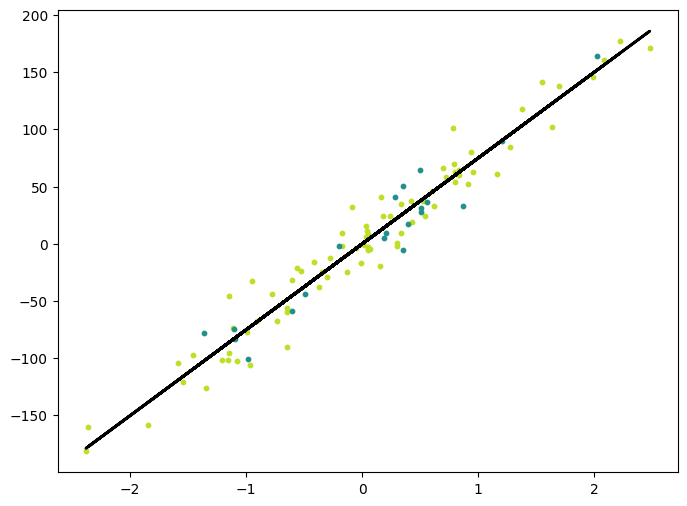

In [19]:
y_pred_line = reg.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label='Prediction')
plt.show()